# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score,confusion_matrix,classification_report
from sklearn import preprocessing
from imblearn.over_sampling import SVMSMOTE
import warnings
warnings.filterwarnings('ignore')

# Basic EDA
Most of understanding was done using pandas profiling as it made really easy to understand the data.

In [2]:
df=pd.read_csv("../input/nasa-nearest-earth-objects/neo_v2.csv")

In [3]:
df.head()

id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True

In [4]:
df.describe()

id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.700000  
75%     5.654900e+07           25.700000  
max     7.479865e+07           33.200000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [7]:
print(df["orbiting_body"].unique())
print(df['sentry_object'].unique())

['Earth']
[False]


Dropping columns id(high number of duplicates) ,name(too many categorical values),orbiting_body(single value),sentry_object(single_value)  and est_diamter_min(completely correalted with est_diameter_max so won't be much use)

In [8]:
df=df.drop(['id','name','orbiting_body','sentry_object','est_diameter_min'],axis=1)

In [9]:
le=LabelEncoder()
df['hazardous']=le.fit_transform(df['hazardous'])

In [10]:
df.head()

est_diameter_max  relative_velocity  miss_distance  absolute_magnitude  \
0          2.679415       13569.249224   5.483974e+07               16.73   
1          0.594347       73588.726663   6.143813e+07               20.00   
2          1.614507      114258.692129   4.979872e+07               17.83   
3          0.215794       24764.303138   2.543497e+07               22.20   
4          0.570217       42737.733765   4.627557e+07               20.09   

   hazardous  
0          0  
1          1  
2          0  
3          0  
4          1

<AxesSubplot:>

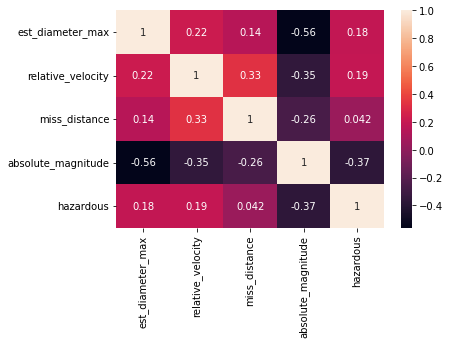

In [11]:
sns.heatmap(df.corr(), annot = True)

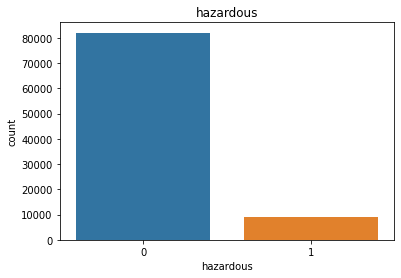

In [12]:
sns.countplot(df['hazardous'])
plt.title('hazardous')
plt.show()

<AxesSubplot:xlabel='est_diameter_max'>

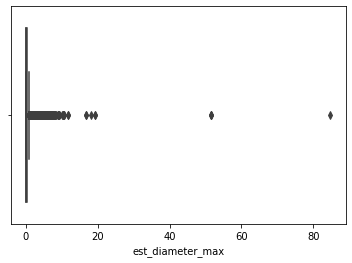

In [13]:
sns.boxplot(df['est_diameter_max'])

<AxesSubplot:xlabel='relative_velocity'>

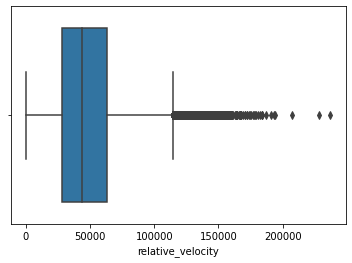

In [14]:
sns.boxplot(df['relative_velocity'])

<AxesSubplot:xlabel='miss_distance'>

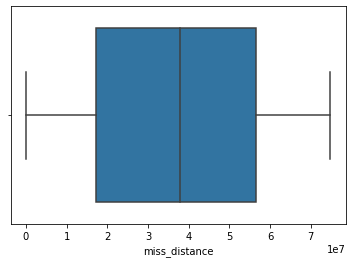

In [15]:
sns.boxplot(df['miss_distance'])

<AxesSubplot:xlabel='absolute_magnitude'>

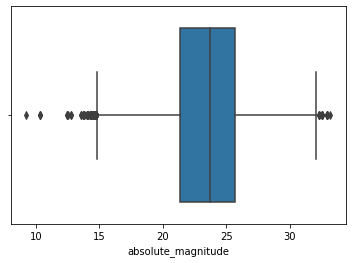

In [16]:
sns.boxplot(df['absolute_magnitude'])

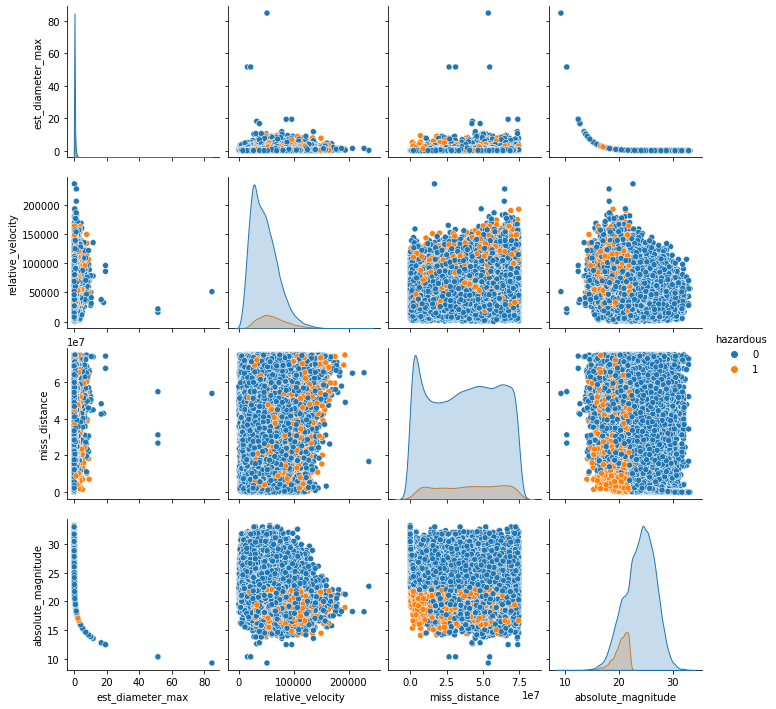

In [17]:
sns.pairplot(df,hue = 'hazardous' )

Tried removing outliers but results worsened.

In [18]:
"""Q1=np.percentile(df['est_diameter_max'],25)
Q3=np.percentile(df['est_diameter_max'],75)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR
df=df[(df['est_diameter_max']<=ul) & (df['est_diameter_max']>=ll)]
df=df.reset_index(drop=True)"""

"Q1=np.percentile(df['est_diameter_max'],25)\nQ3=np.percentile(df['est_diameter_max'],75)\nIQR=Q3-Q1\nul=Q3+1.5*IQR\nll=Q1-1.5*IQR\ndf=df[(df['est_diameter_max']<=ul) & (df['est_diameter_max']>=ll)]\ndf=df.reset_index(drop=True)"

In [19]:
X=df.drop(['hazardous'],axis=1)

In [20]:
y=pd.DataFrame(df.hazardous)

As the target value is highly imbalanced tried using smote but doesn't help as the data is limited. But in case of real world we should try to use SMOTE or Nearmiss.

In [21]:
"""sm=SVMSMOTE()
X,y=sm.fit_resample(X,y)"""

'sm=SVMSMOTE()\nX,y=sm.fit_resample(X,y)'

In [22]:
"""sns.countplot(y['hazardous'])
plt.title('hazardous')
plt.show()"""

"sns.countplot(y['hazardous'])\nplt.title('hazardous')\nplt.show()"

In [23]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Splitting Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
gc.collect()

315

In [26]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

In [27]:
accuracy_score_1=accuracy_score(y_test, y_pred1)
precision_score_1=precision_score(y_test, y_pred1)
recall_score_1=recall_score(y_test, y_pred1)
f1_score_1=f1_score(y_test, y_pred1)
print("Accuracy:",accuracy_score_1)
print("Precision:",precision_score_1)
print("Recall:",recall_score_1)
print("F1 Score:",f1_score_1)

Accuracy: 0.9102418259880372
Precision: 0.7694300518134715
Recall: 0.11190655614167294
F1 Score: 0.19539473684210526


<AxesSubplot:>

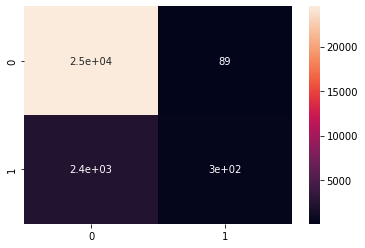

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot = True)

In [29]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24597
           1       0.77      0.11      0.20      2654

    accuracy                           0.91     27251
   macro avg       0.84      0.55      0.57     27251
weighted avg       0.90      0.91      0.88     27251



In [30]:
from sklearn.svm import LinearSVC
model = LinearSVC(tol=1e-4)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

In [31]:
accuracy_score_2=accuracy_score(y_test, y_pred2)
precision_score_2=precision_score(y_test, y_pred2)
recall_score_2=recall_score(y_test, y_pred2)
f1_score_2=f1_score(y_test, y_pred2)
print("Accuracy:",accuracy_score_2)
print("Precision:",precision_score_2)
print("Recall:",recall_score_2)
print("F1 Score:",f1_score_2)

Accuracy: 0.9030861252798063
Precision: 0.8095238095238095
Recall: 0.00640542577241899
F1 Score: 0.012710280373831777


<AxesSubplot:>

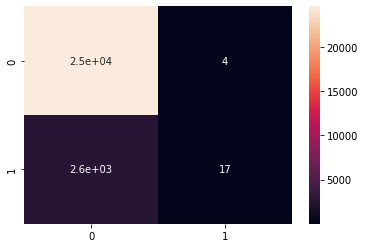

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot = True)

In [33]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24597
           1       0.81      0.01      0.01      2654

    accuracy                           0.90     27251
   macro avg       0.86      0.50      0.48     27251
weighted avg       0.89      0.90      0.86     27251



In [34]:
from sklearn.svm import SVC
model = SVC(kernel="sigmoid")
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

In [35]:
accuracy_score_3=accuracy_score(y_test, y_pred3)
precision_score_3=precision_score(y_test, y_pred3)
recall_score_3=recall_score(y_test, y_pred3)
f1_score_3=f1_score(y_test, y_pred3)
print("Accuracy:",accuracy_score_3)
print("Precision:",precision_score_3)
print("Recall:",recall_score_3)
print("F1 Score:",f1_score_3)

Accuracy: 0.8408131811676636
Precision: 0.17615384615384616
Recall: 0.17256970610399397
F1 Score: 0.17434335744194898


<AxesSubplot:>

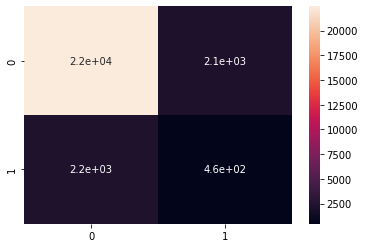

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot = True)

In [37]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     24597
           1       0.18      0.17      0.17      2654

    accuracy                           0.84     27251
   macro avg       0.54      0.54      0.54     27251
weighted avg       0.84      0.84      0.84     27251



In [38]:
from sklearn.svm import SVC
model = SVC(kernel="poly")
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)

In [39]:
accuracy_score_4=accuracy_score(y_test, y_pred4)
precision_score_4=precision_score(y_test, y_pred4)
recall_score_4=recall_score(y_test, y_pred4)
f1_score_4=f1_score(y_test, y_pred4)
print("Accuracy:",accuracy_score_4)
print("Precision:",precision_score_4)
print("Recall:",recall_score_4)
print("F1 Score:",f1_score_4)

Accuracy: 0.9026090785659242
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


<AxesSubplot:>

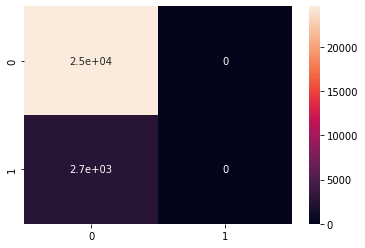

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred4),annot = True)

In [41]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24597
           1       0.00      0.00      0.00      2654

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.81      0.90      0.86     27251



In [42]:
accuracy_score=[accuracy_score_1,accuracy_score_2,accuracy_score_3,accuracy_score_4]
precision_score=[precision_score_1,precision_score_2,precision_score_3,precision_score_4]
recall_score=[recall_score_1,recall_score_2,recall_score_3,recall_score_4]
f1_score=[f1_score_1,f1_score_2,f1_score_3,f1_score_4]
kernel=['Rbf','Linear','Sigmoid','poly']

<AxesSubplot:>

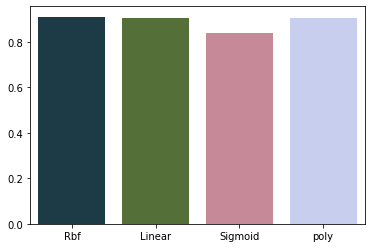

In [43]:
sns.barplot(x=kernel, y=accuracy_score,palette="cubehelix")

<AxesSubplot:>

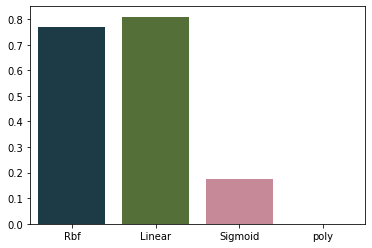

In [44]:
sns.barplot(x=kernel, y=precision_score,palette="cubehelix")

<AxesSubplot:>

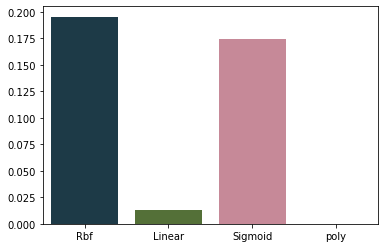

In [45]:
sns.barplot(x=kernel, y=f1_score,palette="cubehelix")

<AxesSubplot:>

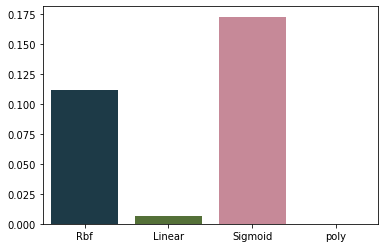

In [46]:
sns.barplot(x=kernel, y=recall_score,palette="cubehelix")